In [13]:
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv('/Users/anushkagupta/Desktop/Academics/7th sem/DL Project/Dataset 8 (2).csv')

In [15]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ["P1","P2","P3","P4","P5","P6"]

scaler = MinMaxScaler()

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [16]:
df.head()

,Date\t,Time,P1,P2,P3,P4,P5,P6,P7,P8,P9
0,11-10-2011,00:05.3,0.47191,0.225,0.481937,0.517483,0.931034,0.95122,0,0,0
1,11-10-2011,00:06.3,0.47191,0.225,0.481937,0.517483,0.931034,0.95122,0,0,0
2,11-10-2011,00:06.8,0.47191,0.225,0.481937,0.517483,0.931034,0.95122,0,0,0
3,11-10-2011,00:08.3,0.47191,0.225,0.481937,0.517483,0.931034,0.95122,0,0,0
4,11-10-2011,00:09.9,0.47191,0.225,0.481937,0.517483,0.931034,0.95122,0,0,0


In [17]:
df['datetime'] = pd.to_datetime(df['Date\t'] + ' ' + df['Time'], format='%d-%m-%Y %M:%S.%f')
df = df.drop(['Date\t', 'Time'], axis=1)

In [18]:
datetime_column = df['datetime']
df = df.drop(columns=['datetime'])
df.insert(0, 'Datetime', datetime_column)
df.head()

,Datetime,P1,P2,P3,P4,P5,P6,P7,P8,P9
0,2011-10-11 00:00:05.300,0.47191,0.225,0.481937,0.517483,0.931034,0.95122,0,0,0
1,2011-10-11 00:00:06.300,0.47191,0.225,0.481937,0.517483,0.931034,0.95122,0,0,0
2,2011-10-11 00:00:06.800,0.47191,0.225,0.481937,0.517483,0.931034,0.95122,0,0,0
3,2011-10-11 00:00:08.300,0.47191,0.225,0.481937,0.517483,0.931034,0.95122,0,0,0
4,2011-10-11 00:00:09.900,0.47191,0.225,0.481937,0.517483,0.931034,0.95122,0,0,0


In [19]:
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

In [20]:
features = df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9']]

In [46]:
# Anomaly detection using One-Class SVM
svm_model = OneClassSVM(nu=0.0005)  # You can adjust the nu parameter based on your dataset
svm_predictions = svm_model.fit_predict(features)

In [47]:
# Anomaly detection using Local Outlier Factor (LOF)
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.0005)  # Adjust parameters accordingly
lof_predictions = lof_model.fit_predict(features)


In [48]:
# Combine the results from both models
df['SVM_Anomaly'] = svm_predictions
df['LOF_Anomaly'] = lof_predictions

In [49]:
# Filter out the rows where either SVM or LOF detects an anomaly
anomaly_df = df[(df['SVM_Anomaly'] == -1) & (df['LOF_Anomaly'] == -1)]

# Print or save the datetime of anomalies
anomaly_datetimes = anomaly_df['Datetime']
print("Anomaly Datetimes:")
print(anomaly_datetimes)


Anomaly Datetimes:
4673     2011-10-11 00:47:51.400
4674     2011-10-11 00:47:52.900
4675     2011-10-11 00:47:54.500
4676     2011-10-11 00:47:55.500
4677     2011-10-11 00:47:56.000
4678     2011-10-11 00:47:57.500
4679     2011-10-11 00:47:59.100
4680     2011-10-11 00:48:02.600
4681     2011-10-11 00:48:07.800
106859   2011-11-03 00:30:00.900
106860   2011-11-03 00:30:05.000
106861   2011-11-03 00:30:05.500
106862   2011-11-03 00:30:12.200
165239   2011-11-14 00:47:51.400
165240   2011-11-14 00:47:52.900
165241   2011-11-14 00:47:54.500
165242   2011-11-14 00:47:55.500
165243   2011-11-14 00:47:56.000
165244   2011-11-14 00:47:57.500
165245   2011-11-14 00:47:59.100
165246   2011-11-14 00:48:02.600
165247   2011-11-14 00:48:07.800
Name: Datetime, dtype: datetime64[ns]


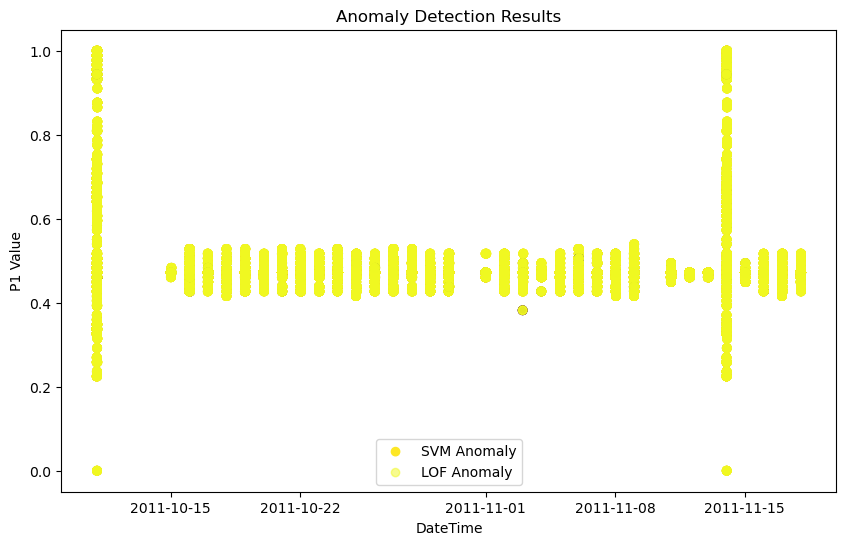

In [50]:
# Plot the anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df['Datetime'], df['P1'], c=df['SVM_Anomaly'], cmap='viridis', label='SVM Anomaly')
plt.scatter(df['Datetime'], df['P1'], c=df['LOF_Anomaly'], cmap='plasma', label='LOF Anomaly', alpha=0.5)
plt.xlabel('DateTime')
plt.ylabel('P1 Value')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()